In [10]:
# import libraries
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Step 2: import necessary libaries
from pycaret.datasets import get_data
from pycaret.classification import *

In [12]:
# Option 1: use built-in sample dataset 
from pycaret.datasets import get_data
data = get_data('diabetes') 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
print(data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [17]:
# Setup PyCaret environment 
# this is where all the Preprocessing of data is done 
# Change target name if using your data 
clf1 = setup(data = data, target = 'Outcome', session_id = 123)


# Option 2 :
#clf1 = setup(data = data, target = 'Class variable', session_id = 123
#             normalize = True, categorical_features = None,
#             ignore_features = None, silent = True,
#             feature_selection = True, remove_multicollinearity = True,
#             multicollinearity_threshold = 095)


,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [21]:
# Train multiple models on a sample of dataset 
# Picks the model with the highest score.
from pycaret.classification import *
best_model = compare_models(include = ['rf', 'lightgbm', 'et', 'dt'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.9250
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1300
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1000
dt,Decision Tree Classifier,0.6928,0.6512,0.5137,0.5636,0.5328,0.3070,0.3098,0.0210


In [22]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.0330
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0210
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0220
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.1600
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0220
gbc,Gradient Boosting Classifier,0.7373,0.7914,0.5550,0.6445,0.5931,0.4013,0.4059,0.1070
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.0810
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1240
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0210
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1000


In [25]:
# Finalize the best model 
#This trains the best model on complete dataset 
final_model = finalize_model(best_model)


In [26]:
# Predict on the dataset 
predictions = predict_model(final_model, data = data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7812,0.8391,0.5821,0.7358,0.6500,0.4940,0.5012


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.7194
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9507
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.7926
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9573
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8897


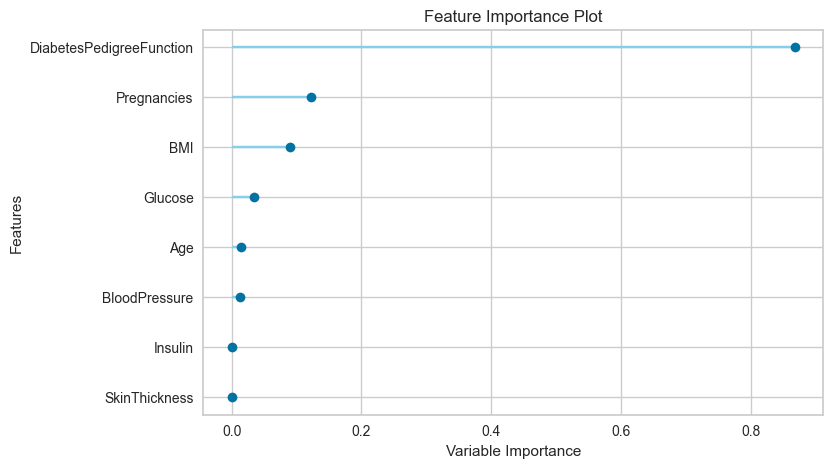

In [27]:
# Feature importance 
plot_model(estimator = final_model, plot = "feature")